# Task C

In [1]:
import math, torch, csv
import matplotlib.pyplot as plt

## Read data from file

In [2]:
day = []
head_circumference = []
with open('data/day_head_circumference.csv', newline='') as csv_file:
    csv_file.readline()
    csv_reader = csv.reader(csv_file)
    for row in csv_reader:
        day.append(float(row[0]))
        head_circumference.append(float(row[1]))

In [3]:
x_train = torch.tensor(day).reshape(-1, 1)
y_train = torch.tensor(head_circumference).reshape(-1, 1)

In [4]:
class NonLinearRegressionModel: 
    def __init__(self):
        self.W = torch.tensor([[0.0]], requires_grad=True)
        self.b = torch.tensor([[0.0]], requires_grad=True)
        
    def sigma(self, z):
        return 1 / (1 + pow(math.e, -z))
        
    def f(self, x):
        return 20 * torch.sigmoid(x @ self.W + self.b) + 31
    
    def loss(self, x, y):
        return torch.nn.functional.mse_loss(self.f(x), y)

In [5]:
model = NonLinearRegressionModel()

## Optimizing

In [6]:
optimizer = torch.optim.SGD([model.b, model.W], 0.000001)
for epoch in range(100000):
    model.loss(x_train, y_train).backward()
    optimizer.step()
    optimizer.zero_grad()
print('Done')

Done


## Results

In [7]:
print('W = %s, b = %s, loss = %s' % (model.W, model.b, model.loss(x_train, y_train)))

W = tensor([[0.0025]], requires_grad=True), b = tensor([[-0.1177]], requires_grad=True), loss = tensor(2.6798, grad_fn=<MseLossBackward>)


## Plotting

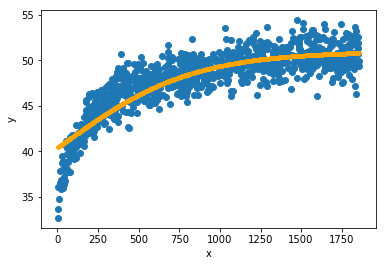

In [8]:
plt.plot(x_train, y_train, 'o', label='$(\\hat x^{(i)}, \\hat y^{(i)})$', zorder=1)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_train, model.f(x_train).detach(), s=10, label='$y = f(x) = 20\u03C3(xW+b)+31$', color='orange', zorder=2)
plt.show()